In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('Flipkart_Mobiles.csv')
df

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990
...,...,...,...,...,...,...,...,...
3109,SAMSUNG,M52 5G,Blazing Black,6 GB,128 GB,4.3,25990,25990
3110,SAMSUNG,M52 5G,Icy Blue,6 GB,128 GB,4.3,25489,28449
3111,SAMSUNG,M52 5G,Icy Blue,8 GB,128 GB,4.3,27239,31489
3112,SAMSUNG,M52 5G,Slate Black,8 GB,128 GB,4.2,22989,22989


#UNDERSTANDING THE DATA

In [6]:
df.describe()

,Rating,Selling Price,Original Price
count,2970.000000,3114.000000,3114.000000
mean,4.243098,26436.625562,28333.473025
std,0.271991,30066.892622,31525.599889
min,2.300000,1000.000000,1000.000000
25%,4.100000,9990.000000,10030.250000
50%,4.300000,15000.000000,16889.500000
75%,4.400000,28999.000000,31500.000000
max,5.000000,179900.000000,189999.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           3114 non-null   object 
 1   Model           3114 non-null   object 
 2   Color           3114 non-null   object 
 3   Memory          3071 non-null   object 
 4   Storage         3075 non-null   object 
 5   Rating          2970 non-null   float64
 6   Selling Price   3114 non-null   int64  
 7   Original Price  3114 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 194.8+ KB


#DATA CLEANING:-

In [8]:
mean_rating=df['Rating'].mean()
mean_rating

4.243097643097643

In [9]:
df['Rating']=df['Rating'].fillna(mean_rating)

In [10]:
mode_memory=df['Memory'].mode()[0]
mode_storage=df['Storage'].mode()[0]
df['Memory']=df['Memory'].fillna(mode_memory)
df['Storage']=df['Storage'].fillna(mode_storage)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           3114 non-null   object 
 1   Model           3114 non-null   object 
 2   Color           3114 non-null   object 
 3   Memory          3114 non-null   object 
 4   Storage         3114 non-null   object 
 5   Rating          3114 non-null   float64
 6   Selling Price   3114 non-null   int64  
 7   Original Price  3114 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 194.8+ KB


#Feature Engineering:-

In [12]:
df['discount']=df['Original Price']-df['Selling Price']
df['discount']

,discount
0,4000
1,4000
2,4000
3,4000
4,4000
...,...
3109,0
3110,2960
3111,4250
3112,0


In [13]:
df['discount_percentage']=((df['discount']/df['Original Price'])*100).round(2)
df['discount_percentage']

,discount_percentage
0,25.02
1,25.02
2,22.23
3,22.23
4,25.02
...,...
3109,0.00
3110,10.40
3111,13.50
3112,0.00


In [14]:
df

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price,discount,discount_percentage
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990,4000,25.02
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990,4000,25.02
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990,4000,22.23
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990,4000,22.23
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990,4000,25.02
...,...,...,...,...,...,...,...,...,...,...
3109,SAMSUNG,M52 5G,Blazing Black,6 GB,128 GB,4.3,25990,25990,0,0.00
3110,SAMSUNG,M52 5G,Icy Blue,6 GB,128 GB,4.3,25489,28449,2960,10.40
3111,SAMSUNG,M52 5G,Icy Blue,8 GB,128 GB,4.3,27239,31489,4250,13.50
3112,SAMSUNG,M52 5G,Slate Black,8 GB,128 GB,4.2,22989,22989,0,0.00


#ANALYSIS

#UNIQUE BRANDS:-

In [15]:
df['Brand'].unique()

array(['OPPO', 'HTC', 'IQOO', 'Google Pixel', 'LG', 'ASUS', 'realme',
       'GIONEE', 'Nokia', 'Apple', 'SAMSUNG', 'Lenovo', 'Motorola',
       'POCO', 'vivo', 'Xiaomi', 'Infinix'], dtype=object)

<Axes: title={'center': 'Rating'}, ylabel='Frequency'>

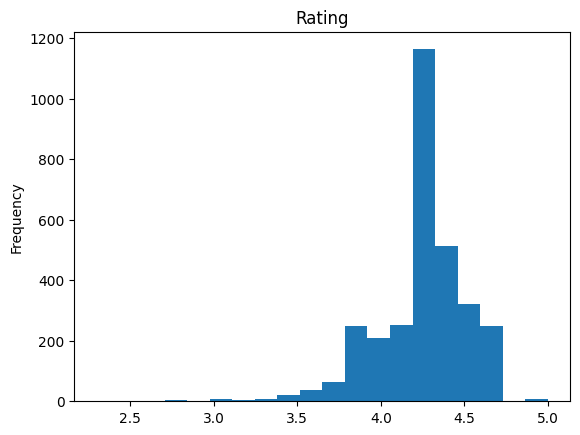

In [16]:
df['Rating'].plot(kind='hist', bins=20, title='Rating')

<Axes: >

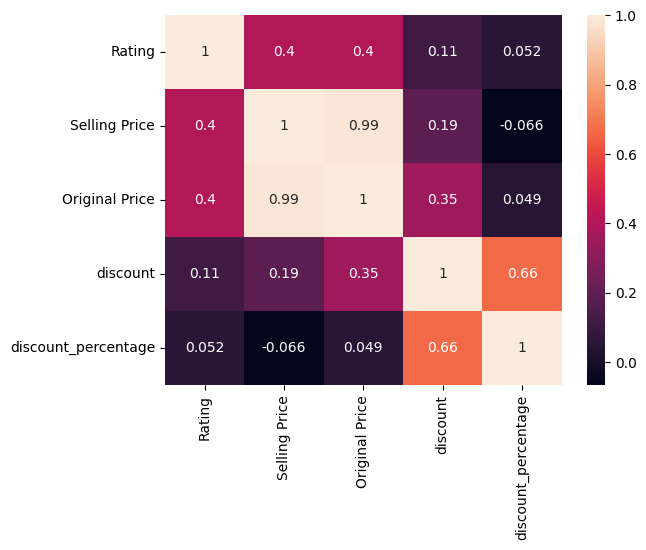

In [17]:
heat=df[['Rating','Selling Price','Original Price','discount','discount_percentage',]].corr()
sns.heatmap(heat,annot=True)

* In above graph we can clearly visualize the correlation between the numeric colums.
* The relation between the columns varies with weak, strong,moderate direct & indirectly proportional like that.

#PRODUCTS COUNT:-

In [18]:
df['Brand'].value_counts()

,count
Brand,
SAMSUNG,719
Apple,387
realme,327
OPPO,260
Nokia,213
Xiaomi,198
Infinix,151
GIONEE,129
vivo,124


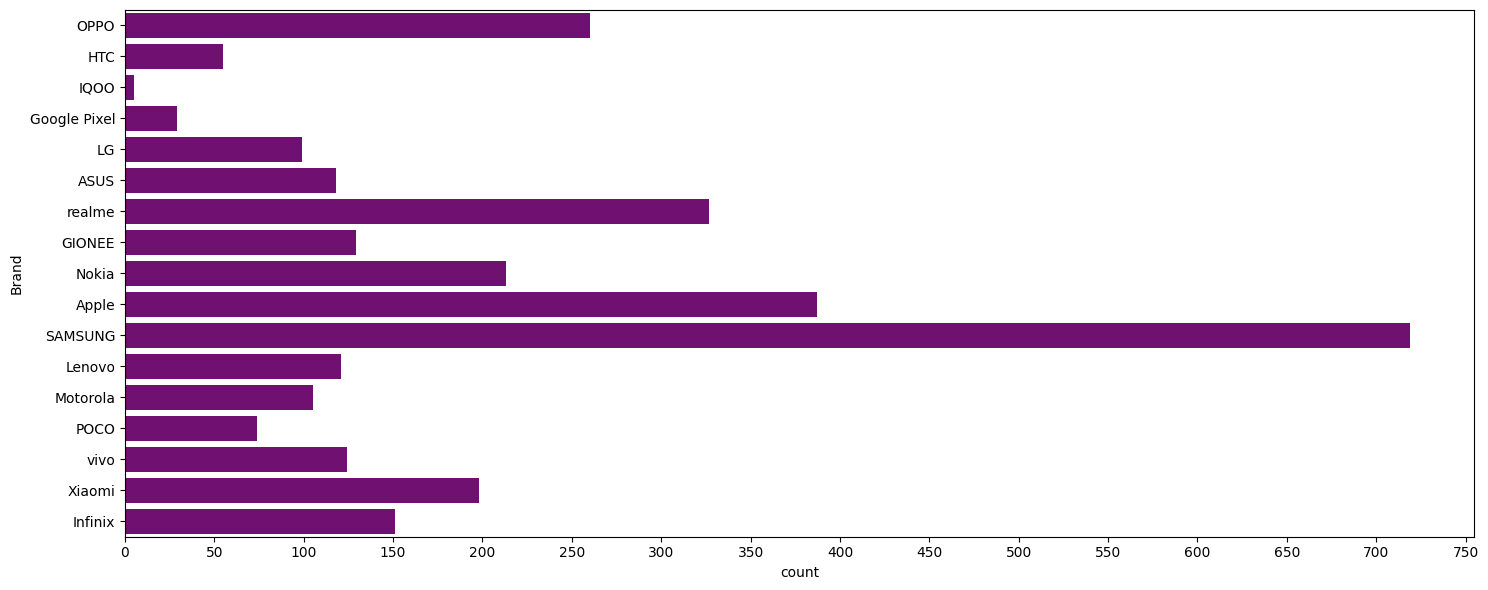

In [19]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,y='Brand',color='purple')
plt.xticks(np.arange(0,800,50))
# plt.grid()
plt.tight_layout()

1. Count of sales differ from various categories like trust on brand,brand value, offers providing, availability & distribution according to region,customers loyalty towards a particular brand, etc,....

#HIGHEST SOLD COLORS:-

In [20]:
df.groupby(['Brand','Color']).value_counts().idxmax()

('Nokia',
 'Blue',
 'C01 Plus ',
 '2 GB',
 '16 GB',
 4.243097643097643,
 6499,
 6499,
 0,
 0.0)

#AVERAGE SEELING PRICE FOR EACH BRAND:-

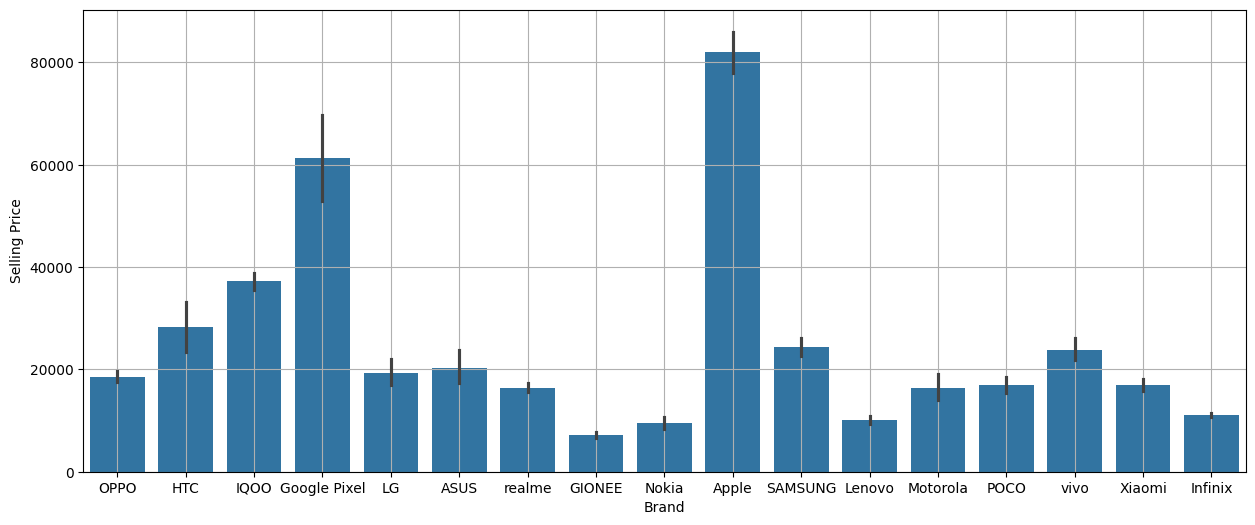

In [21]:
plt.figure(figsize=(15,6))
sns.barplot(data=df,x='Brand',y='Selling Price')
plt.grid()

1. Even the count of products low but average of selling price is high for both Apple, Google Pixel because of the phone cost.
2. And the craze of Apple phone because of it's luxurious brand value among people is high. That's why even Apple launching their products every year in less count, still selling with high cost and quality.

#REALATION BETWEEN RATING AND DISCOUNT:-

<Axes: xlabel='Rating', ylabel='discount'>

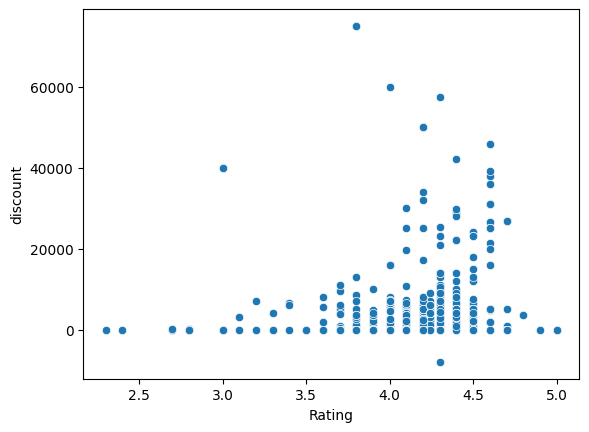

In [22]:
sns.scatterplot(data=df,x='Rating',y='discount')

In [23]:
df

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price,discount,discount_percentage
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990,4000,25.02
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990,4000,25.02
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990,4000,22.23
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990,4000,22.23
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990,4000,25.02
...,...,...,...,...,...,...,...,...,...,...
3109,SAMSUNG,M52 5G,Blazing Black,6 GB,128 GB,4.3,25990,25990,0,0.00
3110,SAMSUNG,M52 5G,Icy Blue,6 GB,128 GB,4.3,25489,28449,2960,10.40
3111,SAMSUNG,M52 5G,Icy Blue,8 GB,128 GB,4.3,27239,31489,4250,13.50
3112,SAMSUNG,M52 5G,Slate Black,8 GB,128 GB,4.2,22989,22989,0,0.00


#CORRELATION OF SELLING AND DISCOUNT:-

<Figure size 1500x1500 with 0 Axes>

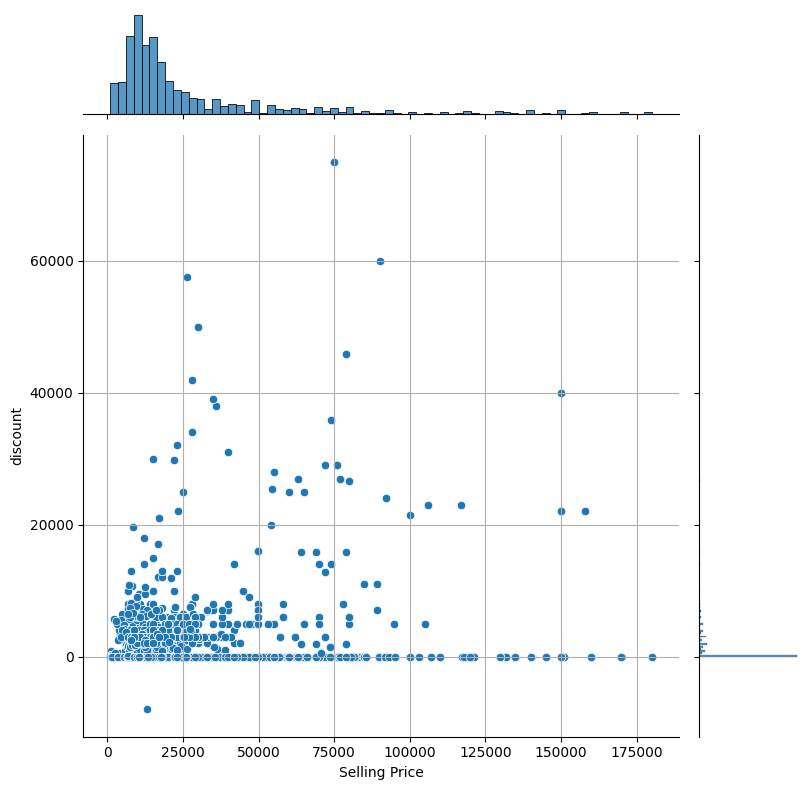

In [24]:
plt.figure(figsize=(15,15))
sns.jointplot(data=df,y='discount',x='Selling Price',kind='scatter',height=8)
plt.grid()
plt.show()

1. Scatter Plot: The individual data points represent different selling prices and their corresponding discounts.
2. Generally, as the selling price increases, the discount tends to decrease. However, there are a few outliers that show high discounts even at various selling prices

#MODELS COUNT IN EACH BRAND:-

In [25]:
# df.groupby(['Brand','Model']).value_counts()
df[['Brand','Model']].value_counts()

Brand    Model                       
Apple    iPhone 11                       36
         iPhone XR                       27
         iPhone 7                        22
         iPhone 11 Pro                   21
         iPhone 7 Plus                   20
                                         ..
SAMSUNG  Metro 360                        1
         Metro B312E Dual Sim - White     1
         Metro B313E Dual Sim - White     1
         Metro SM-B313ez                  1
         Galaxy Note 5 Dual               1
Name: count, Length: 928, dtype: int64

#DISTRIBUTION OF SELLING PRICE:-

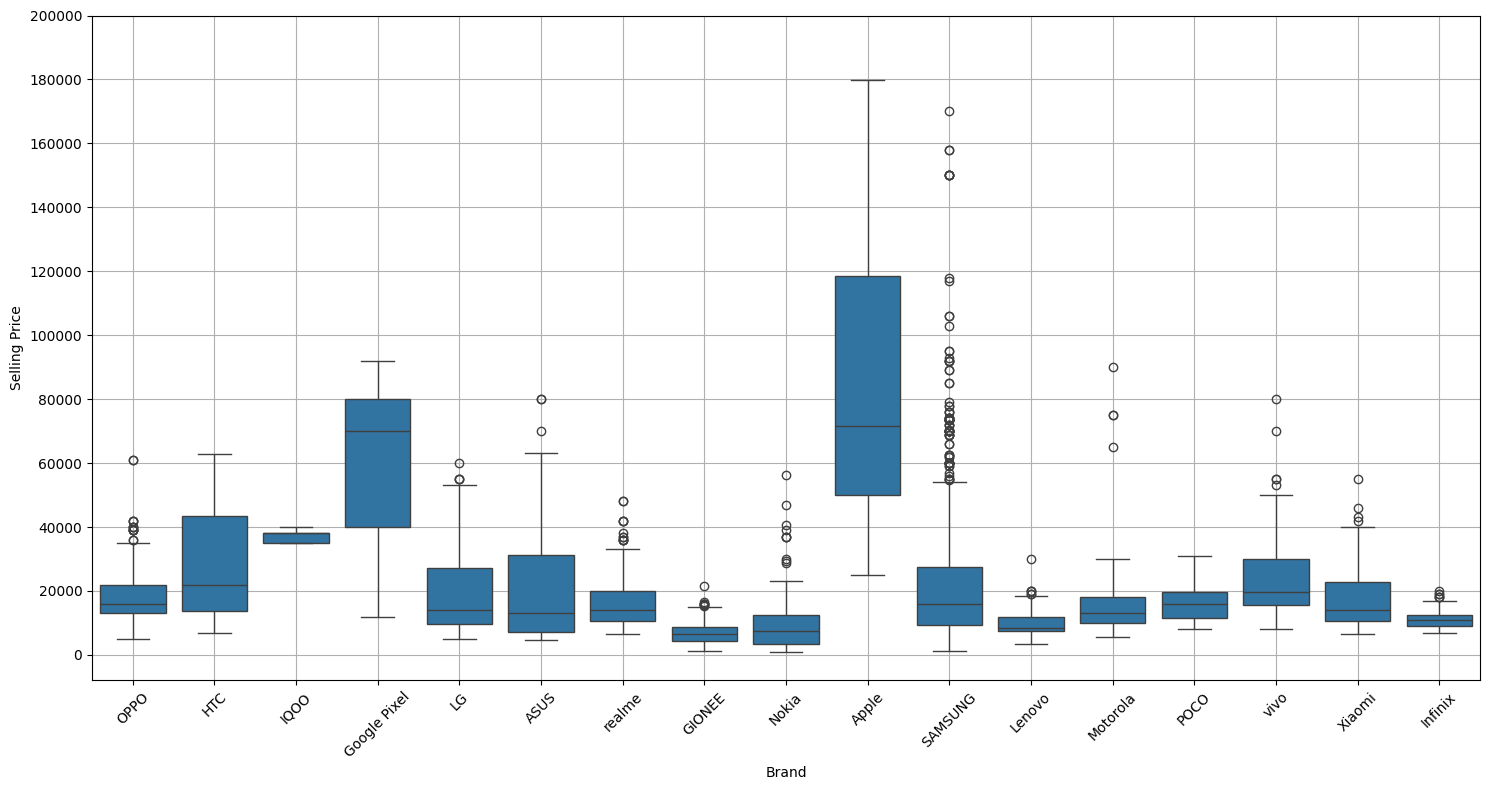

In [26]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df,x='Brand',y='Selling Price')
plt.xticks(rotation=45)
plt.yticks(np.arange(0,200001,20000))
plt.tight_layout()
plt.grid()
# plt.tick_params(axis='x',rotation=45)

1. Selling Price of Samsung mobiles have higher outliers and also starts from least price among phones. Reasons are,
 * Their aim is to provide affordable mobiles to every financial status people
 to become number 1 mobile brand in the world. So they sell mobiles moth affordable as well as costlier too.
2. For Google pixel, Apple, IQOO, POCO there are no outliers. They fixed their selling price as a continuos distribution.
 * Especially Google Pixel and Apple mobiles least price itself 50% higher than some other mobiles & as well as they ar seeing success in selling with that cost too.
 * Its obvious how successful and branded that mobiles among people are.

In [27]:
df

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price,discount,discount_percentage
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990,4000,25.02
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990,4000,25.02
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990,4000,22.23
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990,4000,22.23
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990,4000,25.02
...,...,...,...,...,...,...,...,...,...,...
3109,SAMSUNG,M52 5G,Blazing Black,6 GB,128 GB,4.3,25990,25990,0,0.00
3110,SAMSUNG,M52 5G,Icy Blue,6 GB,128 GB,4.3,25489,28449,2960,10.40
3111,SAMSUNG,M52 5G,Icy Blue,8 GB,128 GB,4.3,27239,31489,4250,13.50
3112,SAMSUNG,M52 5G,Slate Black,8 GB,128 GB,4.2,22989,22989,0,0.00


#MODELS COUNT ACCORDING TO THE MEMORY IN EACH BRANd:-

In [28]:
# df.groupby('Brand')['Memory'].count()
pd.pivot_table(data=df,index='Brand',columns='Memory',values='Model',aggfunc='count')

Memory,1 GB,1.5 GB,10 MB,100 MB,12 GB,128 MB,153 MB,16 GB,16 MB,18 GB,...,4 GB,4 MB,46 MB,4GB,512 MB,6 GB,64 MB,768 MB,8 GB,8 MB
Brand,,,,,,,,,,,,,,,,,,,,,
ASUS,17.0,NaN,NaN,NaN,7.0,NaN,NaN,1.0,NaN,2.0,...,12.0,NaN,NaN,NaN,NaN,12.0,NaN,NaN,12.0,NaN
Apple,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44.0,NaN,NaN,137.0,NaN,47.0,NaN,NaN,NaN,NaN
GIONEE,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.0,NaN,NaN,NaN,5.0,2.0,2.0,NaN,1.0,5.0
Google Pixel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
HTC,18.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,NaN,NaN,NaN,2.0,5.0,NaN,NaN,NaN,NaN
IQOO,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
Infinix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,63.0,NaN,NaN,NaN,NaN,23.0,NaN,NaN,8.0,NaN
LG,11.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.0,NaN,NaN,NaN,3.0,10.0,NaN,1.0,2.0,NaN
Lenovo,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.0,NaN,NaN,NaN,3.0,1.0,NaN,NaN,NaN,NaN


* Mostly all brands provided in 2GB,3GB, 6GB, 8GB & 4GB Ram.
* These all are in most demand.

#DISTRIBUTION OF SELLING PRICE IN DISTRIBUTION:-

In [29]:
avg_brand_selling=df.groupby('Brand')['Selling Price'].mean().round(2)
avg_brand_selling

,Selling Price
Brand,
ASUS,20326.92
Apple,81985.56
GIONEE,7135.09
Google Pixel,61391.86
HTC,28314.38
IQOO,37190.00
Infinix,11092.18
LG,19323.18
Lenovo,10083.84


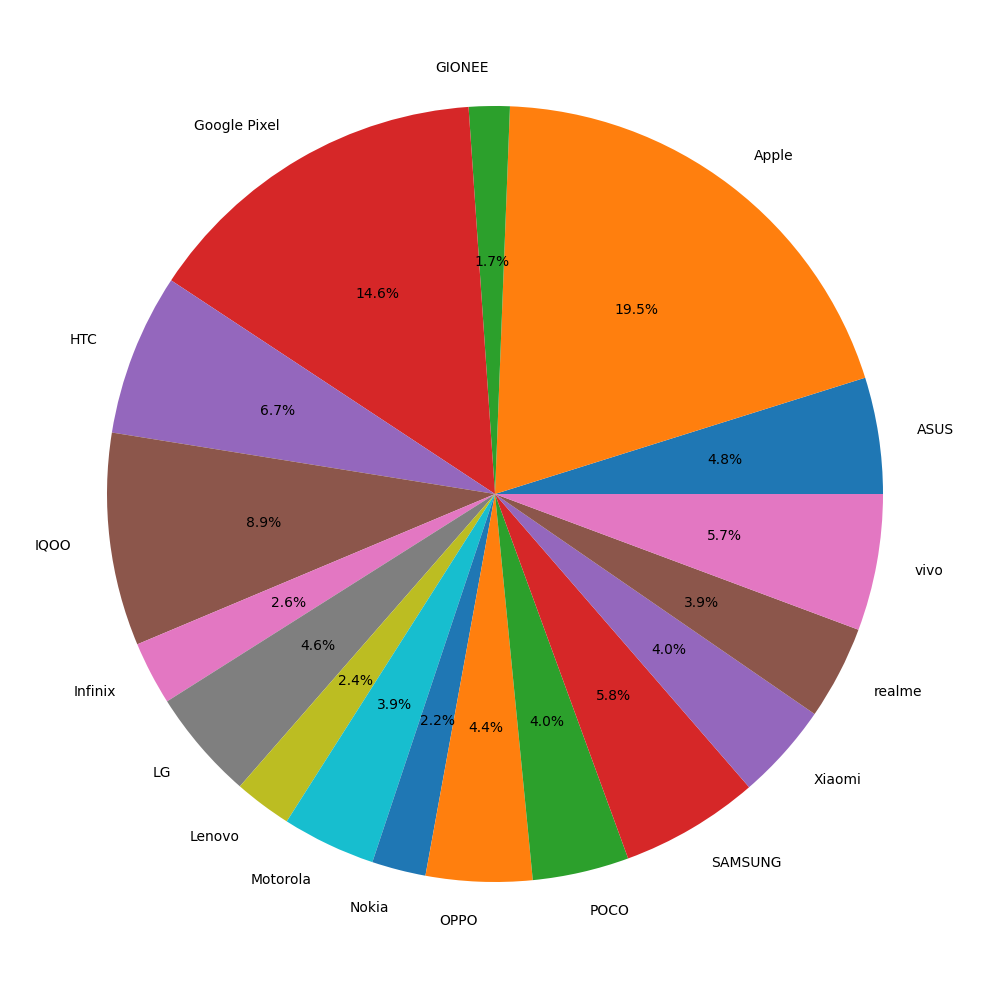

In [30]:
plt.figure(figsize=(10,10))
plt.pie(avg_brand_selling,labels=avg_brand_selling.index,autopct='%1.1f%%')
plt.tight_layout()

* Distribution of Selling price in pie chart
* Once upon a time Nokia was the leading branded phonein entire world, but after the introduction of android phone Nokia mobiles became outdated.
* Even Nokia introduced their own android model but still they couldn't get the customers as they were getting before.

#DISCOUNT COMPARISON AMONG ALL BRANDS:-

In [31]:
avg_discount_percent=df.groupby('Brand')['discount_percentage'].mean().round(2)
avg_discount_percent

,discount_percentage
Brand,
ASUS,1.80
Apple,3.88
GIONEE,5.90
Google Pixel,2.07
HTC,0.00
IQOO,9.07
Infinix,6.88
LG,8.72
Lenovo,2.41


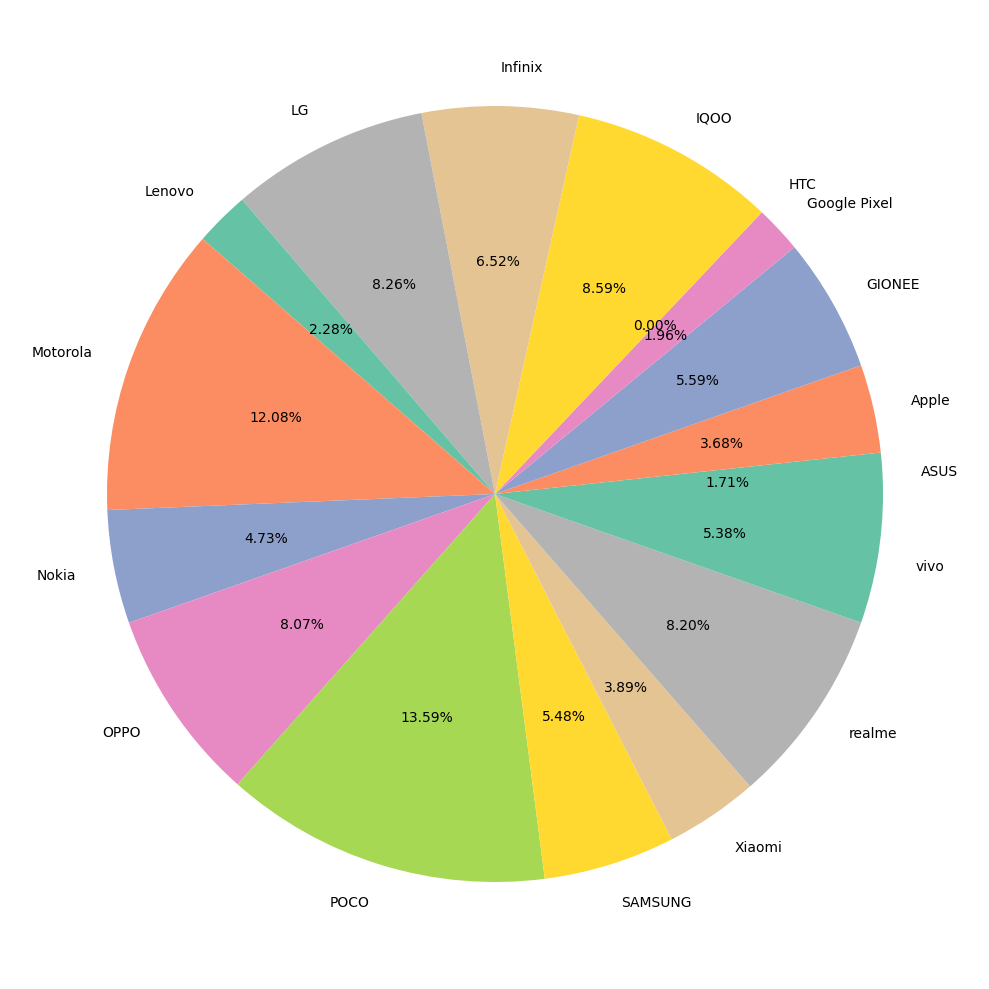

In [32]:
plt.figure(figsize=(10,10))
plt.pie(avg_discount_percent,labels=avg_discount_percent.index,autopct='%.2f%%',colors=plt.get_cmap('Set2').colors)
plt.tight_layout()

1. Recently its obvious that Brands like POCO, realme, Motorola are gaining customers, Reason,
 * They provide good quality featurable mobiles with less price by giving more discount. For example in POCO you can see good processor in 10k - 15k mobiles, even we couldn't get that in some other 25k+ phones.
2. Not only in reducing price and also giving good features will lead you to gain more trust from customers.
3. But for this you require more investment initially with high risk.

In [44]:
c=df['Brand'].value_counts().sort_values(ascending=False)
c

,count
Brand,
SAMSUNG,719
Apple,387
realme,327
OPPO,260
Nokia,213
Xiaomi,198
Infinix,151
GIONEE,129
vivo,124


#COMPARING TOP 3 BRANDS:-

In [34]:
a=df[(df['Brand']=='Apple') | (df['Brand']=='Google Pixel') | (df['Brand']=='SAMSUNG')]
a

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price,discount,discount_percentage
254,Google Pixel,4a,Just Black,6 GB,128 GB,4.5,31999,31999,0,0.00
255,Google Pixel,3a XL,Clearly White,4 GB,64 GB,4.5,44999,44999,0,0.00
256,Google Pixel,3,Just Black,4 GB,64 GB,4.5,69999,69999,0,0.00
257,Google Pixel,3a XL,Just Black,4 GB,64 GB,4.5,44999,44999,0,0.00
258,Google Pixel,3,Clearly White,4 GB,64 GB,4.5,71000,71000,0,0.00
...,...,...,...,...,...,...,...,...,...,...
3109,SAMSUNG,M52 5G,Blazing Black,6 GB,128 GB,4.3,25990,25990,0,0.00
3110,SAMSUNG,M52 5G,Icy Blue,6 GB,128 GB,4.3,25489,28449,2960,10.40
3111,SAMSUNG,M52 5G,Icy Blue,8 GB,128 GB,4.3,27239,31489,4250,13.50
3112,SAMSUNG,M52 5G,Slate Black,8 GB,128 GB,4.2,22989,22989,0,0.00


In [35]:
# sns.countplot(data=a,x='Brand',hue='Model')
a.groupby(['Brand']).value_counts()

Brand    Model       Color  Memory  Storage  Rating  Selling Price  Original Price  discount  discount_percentage
Apple    iPhone XR   Coral  3 GB    64 GB    4.6     42999          47900           4901      10.23                  3
         iPhone 11   Black  4GB     128 GB   4.6     54900          54900           0         0.00                   2
                                    256 GB   4.6     64900          64900           0         0.00                   2
                                    64 GB    4.6     49900          49900           0         0.00                   2
                     Green  4GB     128 GB   4.6     54900          54900           0         0.00                   2
                                                                                                                    ..
SAMSUNG  Z1          White  768 MB  4 GB     3.5     3990           3990            0         0.00                   1
         Z2          Black  1 GB    8 GB     3.6     4790           4790            0         0.00                   1
                     Gold   1 GB    8 GB     3.6     4790           4790            0         0.00                   1
         Z3          Black  1 GB    8 GB     3.4     5590           5590            0         0.00                   1
         Z4          Gold   1 GB    8 GB     3.5     6200           6200            0         0.00                   1
Name: count, Length: 1057, dtype: int64

#DENSITY OF RATING:-

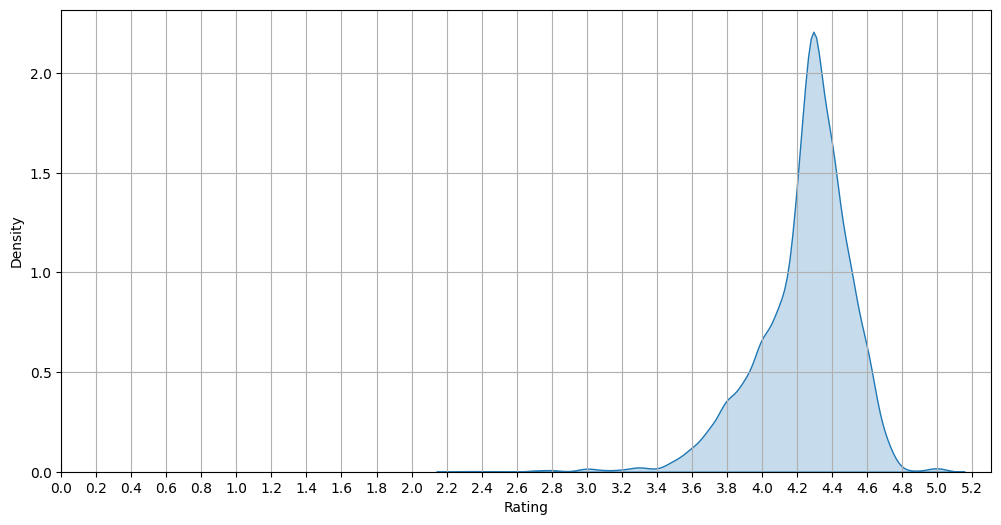

In [36]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=df,x='Rating',fill=True)
plt.xticks(np.arange(0,5.4,0.2))
plt.grid()

1. Majority of the phones got rating in between 4.2 - 4.4 and rest of the phones got above and below of this ratings.
2. Very few number of phones only got above 4.7 and below 3.6

#RATINGS OF PRODUCTS WITH & WITHOUT DISCOUNT.

In [37]:
without_discount=df[df['discount']<=0].sort_values(by='Brand',ascending=True)
without_discount

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price,discount,discount_percentage
442,ASUS,ZenFone Max M2,Silver,3 GB,32 GB,4.3,12999,12999,0,0.0
432,ASUS,Zenfone Max Pro M1,Blue,6 GB,64 GB,4.3,17999,17999,0,0.0
433,ASUS,Zenfone Max Pro M1,Blue,3 GB,32 GB,4.3,13199,13199,0,0.0
434,ASUS,Zenfone Go 4.5 LTE,Silver,1 GB,8 GB,3.6,4890,4890,0,0.0
435,ASUS,Zenfone Go 4.5 LTE,Silver Blue,1 GB,8 GB,3.6,4890,4890,0,0.0
...,...,...,...,...,...,...,...,...,...,...
2793,vivo,U11,Electric Blue,3 GB,64 GB,4.4,11990,11990,0,0.0
2792,vivo,U10,Thunder Black,3 GB,32 GB,4.4,10990,10990,0,0.0
2791,vivo,X50,Frost Blue,8 GB,256 GB,5.0,44990,44990,0,0.0
2805,vivo,Y90,Black,2 GB,16 GB,4.4,7990,7990,0,0.0


In [38]:
with_discount=df[df['discount']>0].sort_values(by='Brand',ascending=True)
with_discount

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price,discount,discount_percentage
477,ASUS,ROG Phone 5 Ultimate,White,18 GB,512 GB,4.243098,79999,85999,6000,6.98
425,ASUS,ROG Phone 5,White,12 GB,256 GB,4.500000,57999,63999,6000,9.38
439,ASUS,ROG Phone 5,White,8 GB,128 GB,4.300000,49999,55999,6000,10.71
443,ASUS,ROG,Black,8 GB,128 GB,4.300000,26499,83999,57500,68.45
466,ASUS,ROG Phone 5 Pro,Black,16 GB,512 GB,4.243098,69999,75999,6000,7.89
...,...,...,...,...,...,...,...,...,...,...
2773,vivo,Y21T,Pearl White,4 GB,128 GB,4.100000,16490,19990,3500,17.51
2772,vivo,Y21T,Midnight Blue,4 GB,128 GB,4.100000,16490,19990,3500,17.51
2770,vivo,Y33T,Midday Dream,8 GB,128 GB,3.900000,18990,22990,4000,17.40
3022,vivo,T1 5G,Rainbow Fantasy,6 GB,128 GB,4.243098,16990,20990,4000,19.06


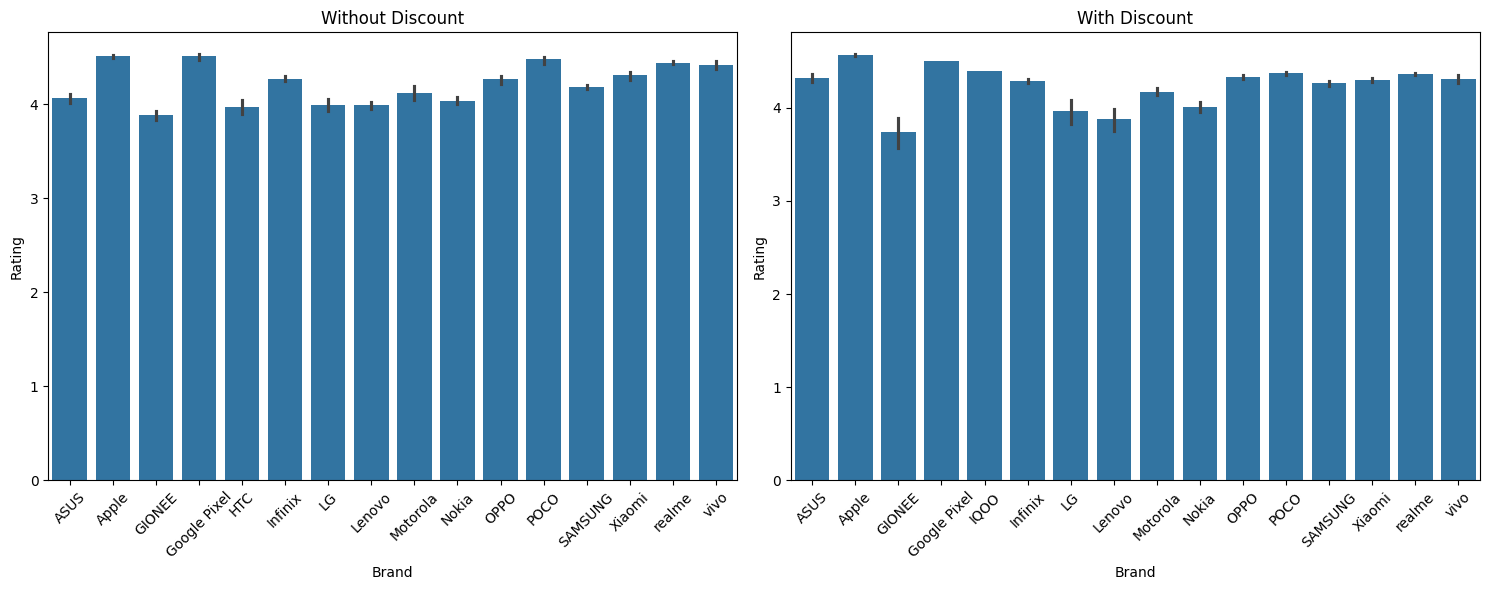

In [39]:
fig,axes=plt.subplots(1,2,figsize=(15,6))
sns.barplot(data=without_discount,y='Rating',x='Brand',ax=axes[0])
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_title('Without Discount')
# axes[0].grid()
sns.barplot(data=with_discount,y='Rating',x='Brand',ax=axes[1])
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_title('With Discount')
# axes[1].grid()
plt.tight_layout()

1. Some Brands ratings hadn't been affected by with or without discount due to brand values and customer satisfaction for given money.
 * eg: Apple, Google Pixel
2. Some affected whether they give discount or not due to poor featues.
3. Some brands got less ratings with dicount but high ratings without discount like Poco,Gionee,etc,. Reasons may be,
 * While giving discount they might had partialized the features more than thir providing discounts. This might had lead to less satisfaction for the customers.

> CONCLUSION:-
1. First of providing memory less than 2GB is outdated nowadays among people. Currently everyone prefering 4GB+ Ram mobiles with 64GB+ storages.
 * This will help everyone to store all their documents in high quality.
 * So Brands should reduce the count of other Ram memories.
2. Brands should not partialize in quality & features while giving discount because people will think that as dishonesty.
3. By some peculiar marketing strategies, they should make people to think like "using their products will be a luxurious things".
 * Promote through big sports,movies influencers.
 * Should provide top quality features and security purpose etc.
4. Colors of mobiles also playing some significant role nowadays. Children also using mobiles vastly, they are commonly attracted through color easily. Adults feel black,white,olive green, etc,. such colors as a classic colors to hold.
** If brands look after this kind of things among their products, then they can increase their customers and products share values.
